In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
from pydataset import data
iris = data('iris')

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [29]:
x = iris.iloc[: , :4]
y = iris['Species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [31]:
from sklearn.preprocessing import LabelEncoder

o = LabelEncoder()
y = o.fit_transform(y)

In [32]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 0)

In [34]:
x_train.shape

(120, 4)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 3 )
knn.fit(x_train,y_train)
print("KNN Score = ",knn.score(x_test , y_test)*100 )
predict = knn.predict(x_test)
cm = confusion_matrix(y_test,predict)
print("\nConfusion matrix is : " , cm , sep='\n')

KNN Score =  96.66666666666667

Confusion matrix is : 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [10]:
dir(knn)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'classes_',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'outputs_2d_',
 'p',
 'predict',
 'predict_proba',
 'radius',
 'score',
 'set_params',
 'weights']

In [20]:
knn.outputs_2d_

False

In [41]:
df = pd.DataFrame({'actual' : y_test , 'predict' : predict})
df['actual_count'] = df.groupby('actual')['actual'].transform('count')
df['predict_count'] = df.groupby('predict')['predict'].transform('count')
df['com'] = df['actual'] == df['predict']
df.sort_values(by = 'actual')

,actual,predict,actual_count,predict_count,com
27,setosa,setosa,11,11,True
34,setosa,setosa,11,11,True
45,setosa,setosa,11,11,True
8,setosa,setosa,11,11,True
23,setosa,setosa,11,11,True
41,setosa,setosa,11,11,True
9,setosa,setosa,11,11,True
25,setosa,setosa,11,11,True
17,setosa,setosa,11,11,True
46,setosa,setosa,11,11,True


In [31]:
y_test.value_counts()

versicolor    13
setosa        11
virginica      6
Name: Species, dtype: int64

In [32]:
# Task:
#     create a k list containing 1 t0 30 
    

In [37]:
k_list = [i for i in range(1,31)]
print(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [101]:
count=[]
average=[]
for i in k_list: 
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(x_train,y_train)
#     print("KNN Score = ",knn.score(x_test , y_test)*100 )
    predict = knn.predict(x_test)
    cm = confusion_matrix(y_test,predict)
#     print("\nConfusion matrix is : " , cm , sep='\n')
    a =( np.eye(3,3) * -cm) + cm 
    count.append(len(a[a!= 0]))
    average.append(np.sum(a) / 3)

In [75]:
predict

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype=object)

In [73]:
# print(count)
print(average)

[0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


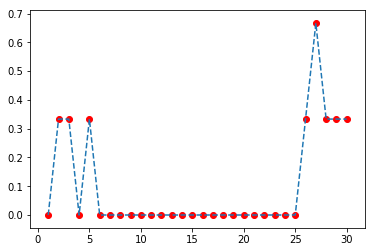

In [105]:
plt.plot(k_list , average , linestyle ='dashed')
plt.scatter(k_list , average , color='red' )

# this graph will give wat k value we need to take

In [98]:
count=[]
average=[]
for i in k_list: 
    knn = KNeighborsClassifier(n_neighbors = i )
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    cm = confusion_matrix(y_test,predict)
    print(predict)
    print(y_test)
    print(predict != y_test)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
115     virginica
63     versicolor
34         setosa
108     virginica
8          setosa
101     virginica
41         setosa
87     versicolor
77     versicolor
72     versicolor
135     virginica
52     versicolor
74     versicolor
55     versicolor
64     versicolor
38         setosa
79     versicolor
91     versicolor
46         setosa
17         setosa
122     virginica
67     versicolor
25         setosa
9          setosa
127     virginica
23         setosa
45         setosa
98     versicolor
94     versicolor
27         setosa
Name: Species, dtype: object
115    False
63     False
34     False
108    False
8      False
101    False
41     

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
115     virginica
63     versicolor
34         setosa
108     virginica
8          setosa
101     virginica
41         setosa
87     versicolor
77     versicolor
72     versicolor
135     virginica
52     versicolor
74     versicolor
55     versicolor
64     versicolor
38         setosa
79     versicolor
91     versicolor
46         setosa
17         setosa
122     virginica
67     versicolor
25         setosa
9          setosa
127     virginica
23         setosa
45         setosa
98     versicolor
94     versicolor
27         setosa
Name: Species, dtype: object
115    False
63     False
34     False
108    False
8      False
101    False
41     

In [92]:
print(np.mean(predict != y_test))
print(np.sum(predict != y_test))
print((predict != y_test).count())
1 / 30

0.03333333333333333
1
30


0.03333333333333333

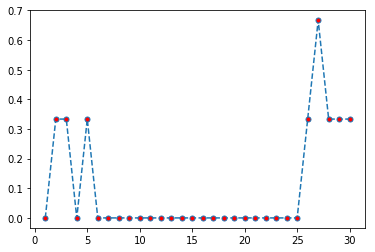

In [104]:
plt.plot(k_list , average , linestyle ='dashed' , marker ='o' , markerfacecolor = 'red' , markersize = 5 )

In [37]:
from sklearn.metrics import mean_squared_error

rmse_val = [] #to store rmse values for different k

for K in range(1 , 31):
    
    model = KNeighborsClassifier(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(( K , error) ) #store rmse values


In [39]:
rmse_val.sort( key = lambda x : ( x[1] , x[0] ) )

In [40]:
rmse_val

[(1, 0.0),
 (4, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (2, 0.18257418583505536),
 (3, 0.18257418583505536),
 (5, 0.18257418583505536),
 (26, 0.18257418583505536),
 (28, 0.18257418583505536),
 (29, 0.18257418583505536),
 (30, 0.18257418583505536),
 (27, 0.2581988897471611)]

In [43]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': np.arange( 1 , 31 ) }

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 12}

In [44]:
model.best_params_

{'n_neighbors': 12}

In [49]:
l = [1,2,3,4]

l[:].pop()

print(l)

[1, 2, 3, 4]


In [97]:
predict != y_test

115    False
63     False
34     False
108    False
8      False
101    False
41     False
87     False
77      True
72     False
135    False
52     False
74     False
55     False
64     False
38     False
79     False
91     False
46     False
17     False
122    False
67     False
25     False
9      False
127    False
23     False
45     False
98     False
94     False
27     False
Name: Species, dtype: bool

In [60]:
a =( np.eye(3,3) * -cm) + cm 
a

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [71]:
a = a.flatten() 
a[a!= 0]

array([1.])

In [3]:
y = ['setosa']*8
y_t = ['setosa']*5 + ['virginica']*2 + ['vercicolor']*1

y = ['virginica']*9 + y
y_t = ['setosa']*3 + ['virginica']*6 + y_t

y=['vercicolor']*13 + y
y_t =  ['setosa']*2 + ['virginica']*3 + ['vercicolor']*8 + y_t

print(len(y))
print(len(y_t))

30
30


In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame({'actual' : y , 'predict' : y_t})
df

,actual,predict
0,vercicolor,setosa
1,vercicolor,setosa
2,vercicolor,virginica
3,vercicolor,virginica
4,vercicolor,virginica
5,vercicolor,vercicolor
6,vercicolor,vercicolor
7,vercicolor,vercicolor
8,vercicolor,vercicolor
9,vercicolor,vercicolor


In [8]:
pd.crosstab(df['actual'] , df['predict'])

predict,setosa,vercicolor,virginica
actual,,,
setosa,5,1,2
vercicolor,2,8,3
virginica,3,0,6


In [19]:
pd.pivot(index = 'actual' , columns ='predict' , values=0 , data = df.groupby(['actual','predict']).size().reset_index())

predict,setosa,vercicolor,virginica
actual,,,
setosa,5.0,1.0,2.0
vercicolor,2.0,8.0,3.0
virginica,3.0,NaN,6.0


In [45]:
l=[1,2,3]
l

[1, 2, 3]

In [46]:
l.pop()

3

In [47]:
l

[1, 2]